# **Nanodegree: Data Scientist
## Building a generic classifier for Risk Patients of Cardiovascular Diseases**

### by Marc-David Krain


## Content of Notebook:

* [Business Understanding/Problem definition](#businssunderstanding)
* [Data Understanding](#dataunderstanding)
* [Data Preparation](#datapreparation)
* [Modeling & Evaluation](#modelingandevaluation)
* [Conclusion & Critical Evaluation](#conclusionanderiticalevaluation)
* [Literature](#literature)

# **Business Understanding/Problem definition**<a class="anchor" id="businssunderstanding"></a>

Cardiovascular Diseases (CVDs) can be accounted responsible for roughly a third of all deaths world wide [[1]](#literature). To reduce this number, there are many approaches to include Machine Learning, in order to provide a data driven strategy for early detection of risk patients for such deseases based on analogues patterns of data of already seen risk patients.

A problem in this approach is, that often to build such a classifier, specific data is needed, that often is connected to cost-consuming medical tests and seldom is available for a larger population.

I aim to build a model that is trying to encounter this issue and is capable to detect based on commonly available patient data, whether a patient is potentially at risk of running victim to a cardiovascular disease and should be contacted for closer invistigation by a physician.

The Dataset itself, I will be utilizing can be found on Kaggle: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
    

An already once before used process for building up a machine learning project, is CRISP-DM. Since the task provided strongly can be connected to the single phases of said process, I will also structure this Notebook strongly based on these phases.

CRISP-DM consists of the following six phases:

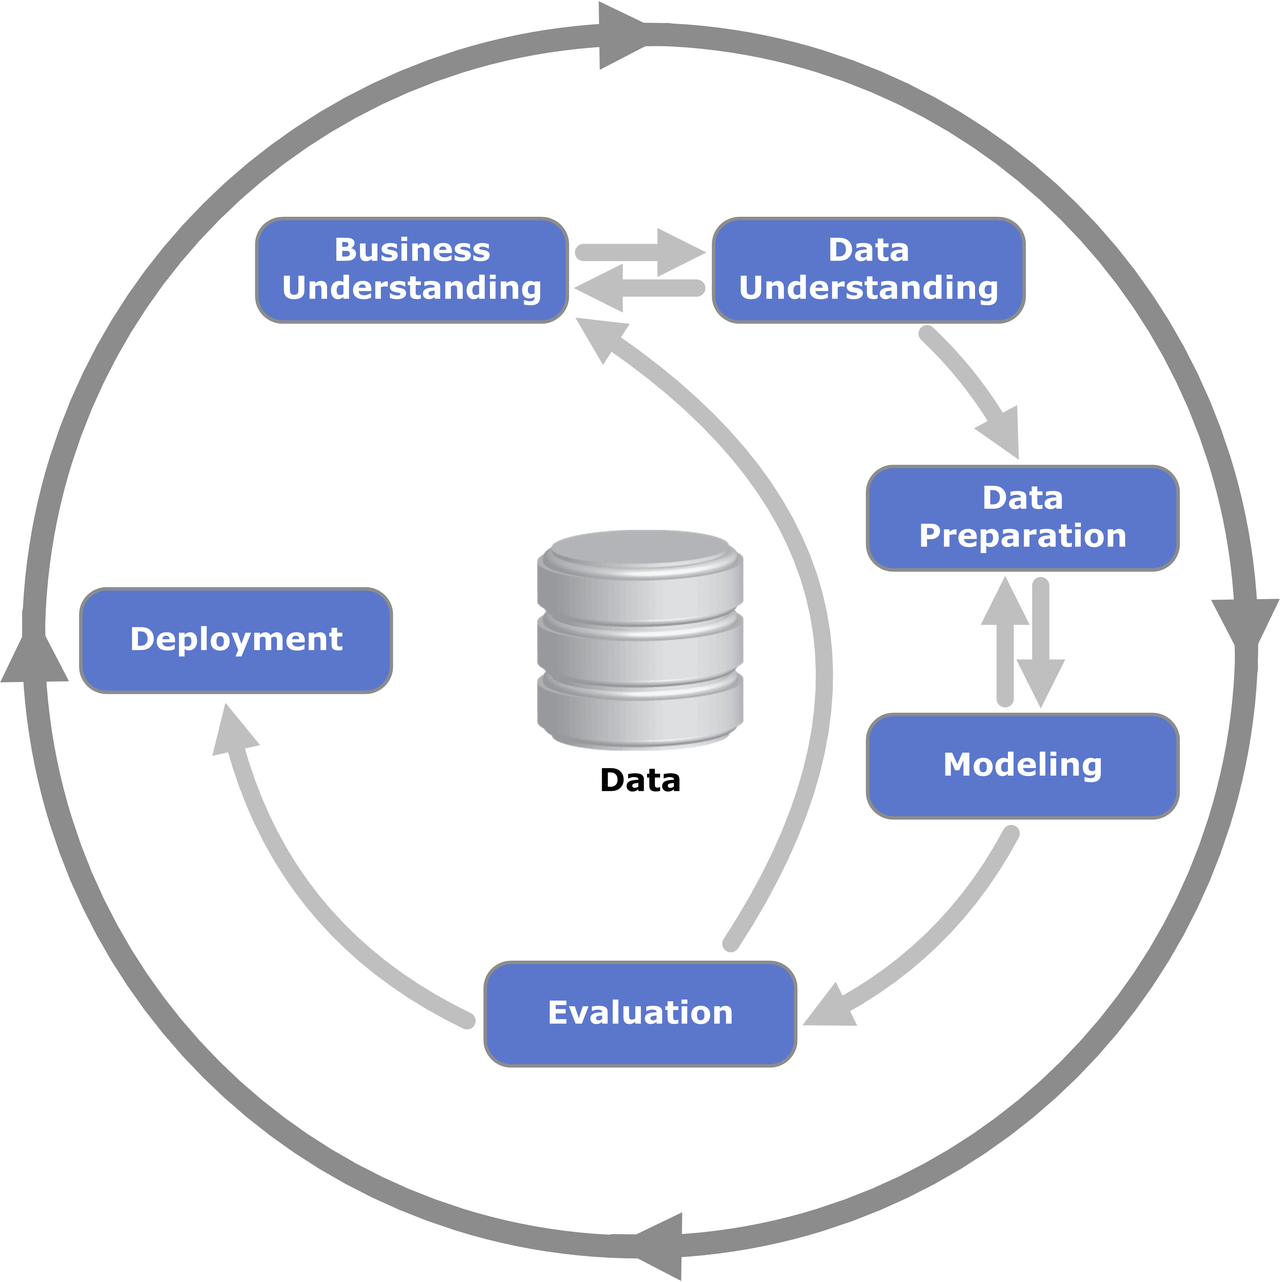

For an elaborated insight into what CRISP-DM is, please refer to the added literature [[2]](#literature).

Since the focus of this notebook resides on data mining & insight discovery followed by fitting a suited model, I will focus the data exploration and modeling phases together with suited visualizations and a overall conclusion summarizing the results of my project. 

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy as scp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score

from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# **Data Understanding**<a class="anchor" id="dataunderstanding"></a>

Based upon the data semantics provided of the distributor within kaggle, we have the following columns:
   
    Age | age | int (days)
    Height | height | int (cm) 
    Weight | weight | float (kg) 
    Gender | gender | categorical code: 1 - women, 2 - men
    Systolic blood pressure | ap_hi | int 
    Diastolic blood pressure | ap_lo | int 
    Cholesterol | cholesterol | categorical code: 1: normal, 2: above normal, 3: well above normal 
    Glucose | gluc | categorical code: 1: normal, 2: above normal, 3: well above normal 
    Smoking | smoke | binary 
    Alcohol intake | alco | binary 
    Physical activity | active | binary 
    Presence or absence of cardiovascular disease | cardio | binary 
    
This gives me a first understanding into what kind of information is behind the different features. Of special interest, would be the column cardio, since this column contains binary information, whether a cardiovascular disease was diagnosed for an observationb, or not and functions as a potential canditate as a target feature to train algorithms onto.


For an enhanced understanding, I will now import the data and look at several different aspects, including summaries, statistics and univarite to multivariate visual analysis.

In [2]:
#load data and have initial look at it
data = pd.read_csv('cardio_train.csv', sep= ';') 
print(data.head(20))

    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0    0  18393       2     168    62.0    110     80            1     1      0   
1    1  20228       1     156    85.0    140     90            3     1      0   
2    2  18857       1     165    64.0    130     70            3     1      0   
3    3  17623       2     169    82.0    150    100            1     1      0   
4    4  17474       1     156    56.0    100     60            1     1      0   
5    8  21914       1     151    67.0    120     80            2     2      0   
6    9  22113       1     157    93.0    130     80            3     1      0   
7   12  22584       2     178    95.0    130     90            3     3      0   
8   13  17668       1     158    71.0    110     70            1     1      0   
9   14  19834       1     164    68.0    110     60            1     1      0   
10  15  22530       1     169    80.0    120     80            1     1      0   
11  16  18815       2     17

Next, I have a look at missinga and a overall statistical summary of the data at hand, to get a first understanding of missings and datatypes

In [3]:
#initial glimpse of data
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#initial glimpse of data to check for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


It appears, that in the entire dataset, there is no missing data. Also the variables are already all-numeric, making retransformation before fitting the data to an algorithm obsolete.

## Univariate Analysis

Starting off for the visual analysis, I will perform an univariate analysis to get a glimpse of first habits of the features.

### Targetfeature: cardio  

0    35021
1    34979
Name: cardio, dtype: int64
count    70000.000000
mean         0.499700
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64


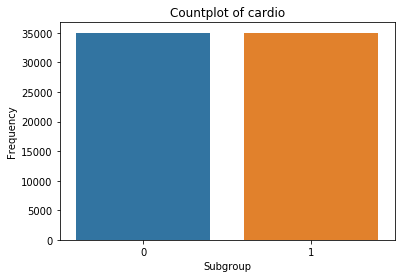

In [5]:
#Valuecounts
print(data["cardio"].value_counts())

#Describe
print(data["cardio"].describe())

#Countplot
sns.countplot(x=data['cardio'])
plt.xlabel('Subgroup')
plt.ylabel('Frequency')
plt.title('Countplot of cardio')
plt.show()

Cardio is even split in frequence of cardiovascular diseases and non cardiovasciolar diseases in observations.

### Feature: age

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64


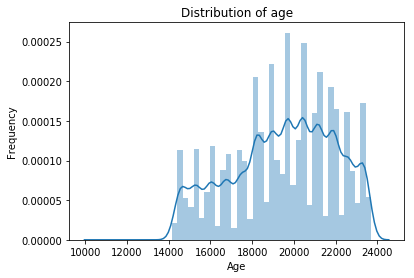

In [6]:
#Describe
print(data["age"].describe())

#Countplot
sns.distplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

* Most frequent age at around 20000 mins/55 years
* Distribution resembles left-skewed habbits of a normal distribution 

### Feature: gender

1    45530
2    24470
Name: gender, dtype: int64
count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64


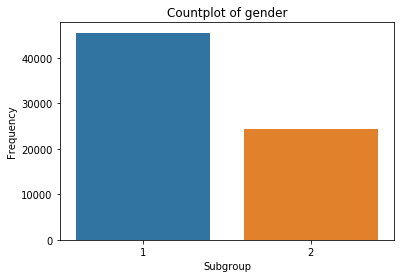

In [7]:
#Valuecounts
print(data["gender"].value_counts())

#Describe
print(data["gender"].describe())

#Countplot
sns.countplot(x=data['gender'])
plt.xlabel('Subgroup')
plt.ylabel('Frequency')
plt.title('Countplot of gender')
plt.show()

The more frequent gender is female with a rough 2:1 ratio of female:male

### Feature: height

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


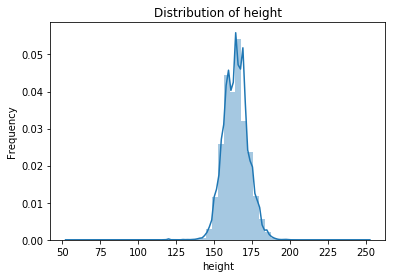

In [8]:
#Describe
print(data["height"].describe())

#Distplot
sns.distplot(data['height'])
plt.xlabel('height')
plt.ylabel('Frequency')
plt.title('Distribution of height')
plt.show()

Height is distributed approximately normal with outliers on left and right still in the range of what is humanly possible.

### Feature: weight

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


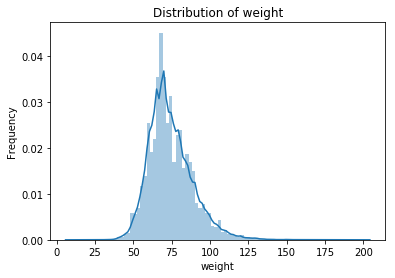

In [9]:
#Describe
print(data["weight"].describe())

#Distplot
sns.distplot(data['weight'], bins = 90)
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight')
plt.show()

Weight is distributed approximately normal with outliers on left and right still in the range of what is humanly possible.

### Feature: ap_hi

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64


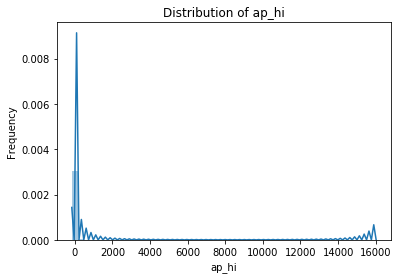

In [10]:
#Describe
print(data["ap_hi"].describe())

#Countplot
sns.distplot(data['ap_hi'])
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.title('Distribution of ap_hi')
plt.show()

AP_Hi has a right skewed pattern with appartently fairly high outliers, that will be invested for plausability later.

### Feature: ap_lo       

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64


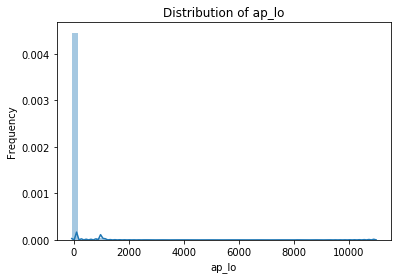

In [11]:
#Describe
print(data["ap_lo"].describe())

#Countplot
sns.distplot(data['ap_lo'])
plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.title('Distribution of ap_lo')
plt.show()

Ap_Lo has a right skewed pattern with appartently fairly hight outliers, that will be invested for plausability later.

### Feature: cholesterol

count    70000.000000
mean         1.366871
std          0.680250
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64


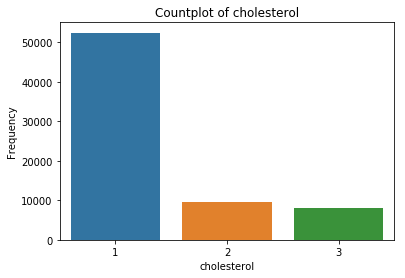

In [12]:
#Describe
print(data["cholesterol"].describe())

#Countplot
sns.countplot(data['cholesterol'])
plt.xlabel('cholesterol')
plt.ylabel('Frequency')
plt.title('Countplot of cholesterol')
plt.show()

The most common level for cholsterol is normal cholesterol level, followed by above normal and well above normal in a much smaller relation.

### Feature: gluc           

count    70000.000000
mean         1.226457
std          0.572270
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: gluc, dtype: float64


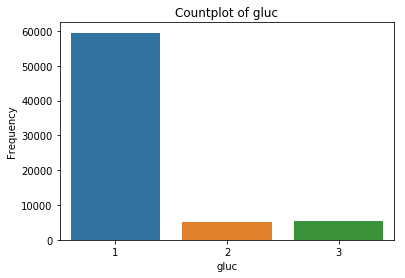

In [13]:
#Describe
print(data["gluc"].describe())

#Countplot
sns.countplot(data['gluc'])
plt.xlabel('gluc')
plt.ylabel('Frequency')
plt.title('Countplot of gluc')
plt.show()

The most common is normal glucose levels followed by above normal and well above normal in a much smaller participation.

### Feature: smoke

count    70000.000000
mean         0.088129
std          0.283484
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: smoke, dtype: float64


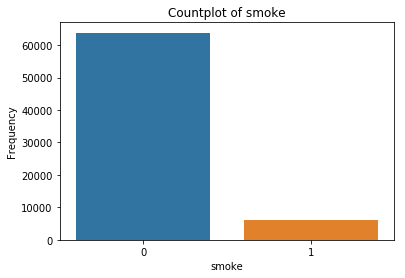

In [14]:
#Describe
print(data["smoke"].describe())

#Countplot
sns.countplot(data['smoke'])
plt.xlabel('smoke')
plt.ylabel('Frequency')
plt.title('Countplot of smoke')
plt.show()

Most of the patients are non-smokers, with a much smaller counterpart of smokers

### Feature: alco

count    70000.000000
mean         0.053771
std          0.225568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: alco, dtype: float64


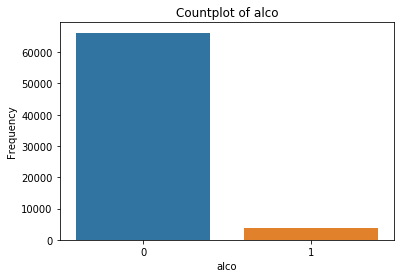

In [15]:
#Describe
print(data["alco"].describe())

#Countplot
sns.countplot(data['alco'])
plt.xlabel('alco')
plt.ylabel('Frequency')
plt.title('Countplot of alco')
plt.show()

Most of the patients are non-drinkers, , with a much smaller counterpart of regular drinkers.

### Feature: active         

count    70000.000000
mean         0.803729
std          0.397179
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: active, dtype: float64


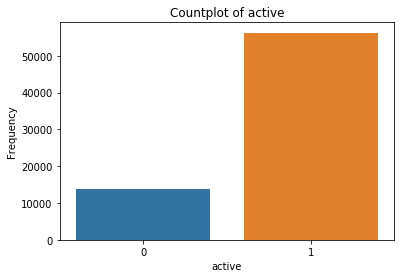

In [16]:
#Describe
print(data["active"].describe())

#Countplot
sns.countplot(data['active'])
plt.xlabel('active')
plt.ylabel('Frequency')
plt.title('Countplot of active')
plt.show()

Most of the patients seem to engage in physical activity, with a  smaller counterpart of non-physically active people.

## Bivariate & Multivariate Analysis  

Since the task is already formulated, I will focus on the relation of the dependant feature (cardio) with the independent features within the dataset. First, I would like to statistically assess relationships. Since we are not really working with numeric data, but categorical data that is mostly encoded as numeric, correlation does not really fit in here. However googleing this, we got other methods, that we can use to check if there is a relation between to features. [[3]](#literature)

In [17]:
# get relation of cardio vs other features
print(scp.stats.f_oneway(data.cardio, data.age))
print(scp.stats.f_oneway(data.cardio, data.height)) 
print(scp.stats.f_oneway(data.cardio, data.weight)) 
print(scp.stats.f_oneway(data.cardio, data.ap_hi)) 
print(scp.stats.f_oneway(data.cardio, data.ap_lo)) 

obs = np.array([data.cardio, data.cholesterol])
print(scp.stats.chi2_contingency(obs, correction=False))

obs = np.array([data.cardio, data.gluc])
print(scp.stats.chi2_contingency(obs, correction=False))

obs = np.array([data.cardio, data.gender])
print(scp.stats.chi2_contingency(obs, correction=False))

F_onewayResult(statistic=4358430.5451754974, pvalue=0.0)
F_onewayResult(statistic=27780111.168200769, pvalue=0.0)
F_onewayResult(statistic=1832782.8527131809, pvalue=0.0)
F_onewayResult(statistic=48591.462993275913, pvalue=0.0)
F_onewayResult(statistic=18210.555749565206, pvalue=0.0)
(28684.939135579007, 1.0, 69999, array([[ 0.26771009,  1.07084035,  1.07084035, ...,  1.07084035,
         0.53542017,  0.53542017],
       [ 0.73228991,  2.92915965,  2.92915965, ...,  2.92915965,
         1.46457983,  1.46457983]]))
(29275.624598698247, 1.0, 69999, array([[ 0.28948697,  0.57897394,  0.57897394, ...,  0.57897394,
         0.86846091,  0.28948697],
       [ 0.71051303,  1.42102606,  1.42102606, ...,  1.42102606,
         2.13153909,  0.71051303]]))
(30310.38289468563, 1.0, 69999, array([[ 0.54042905,  0.54042905,  0.54042905, ...,  0.81064357,
         0.54042905,  0.27021452],
       [ 1.45957095,  1.45957095,  1.45957095, ...,  2.18935643,
         1.45957095,  0.72978548]]))


Looking at the results all p values seem to fall under the np.float threshhold of 1E-16, hence all features tested by anova seem to be significant in relation to cardio.
Furthermore, based upon the fairly high p-value of the chi-square tests, we can roughly approximate, that there seems to be a relation between the values of cardio with these 3 features accoring to literature attached above.

After statistcally assessing the relations of independent and dependent features, next I would like to fokus on a visual analysis of features. Again fokus will be on how cardio relates to other features. For this, I will first start with a general overview in form of an pairplot.

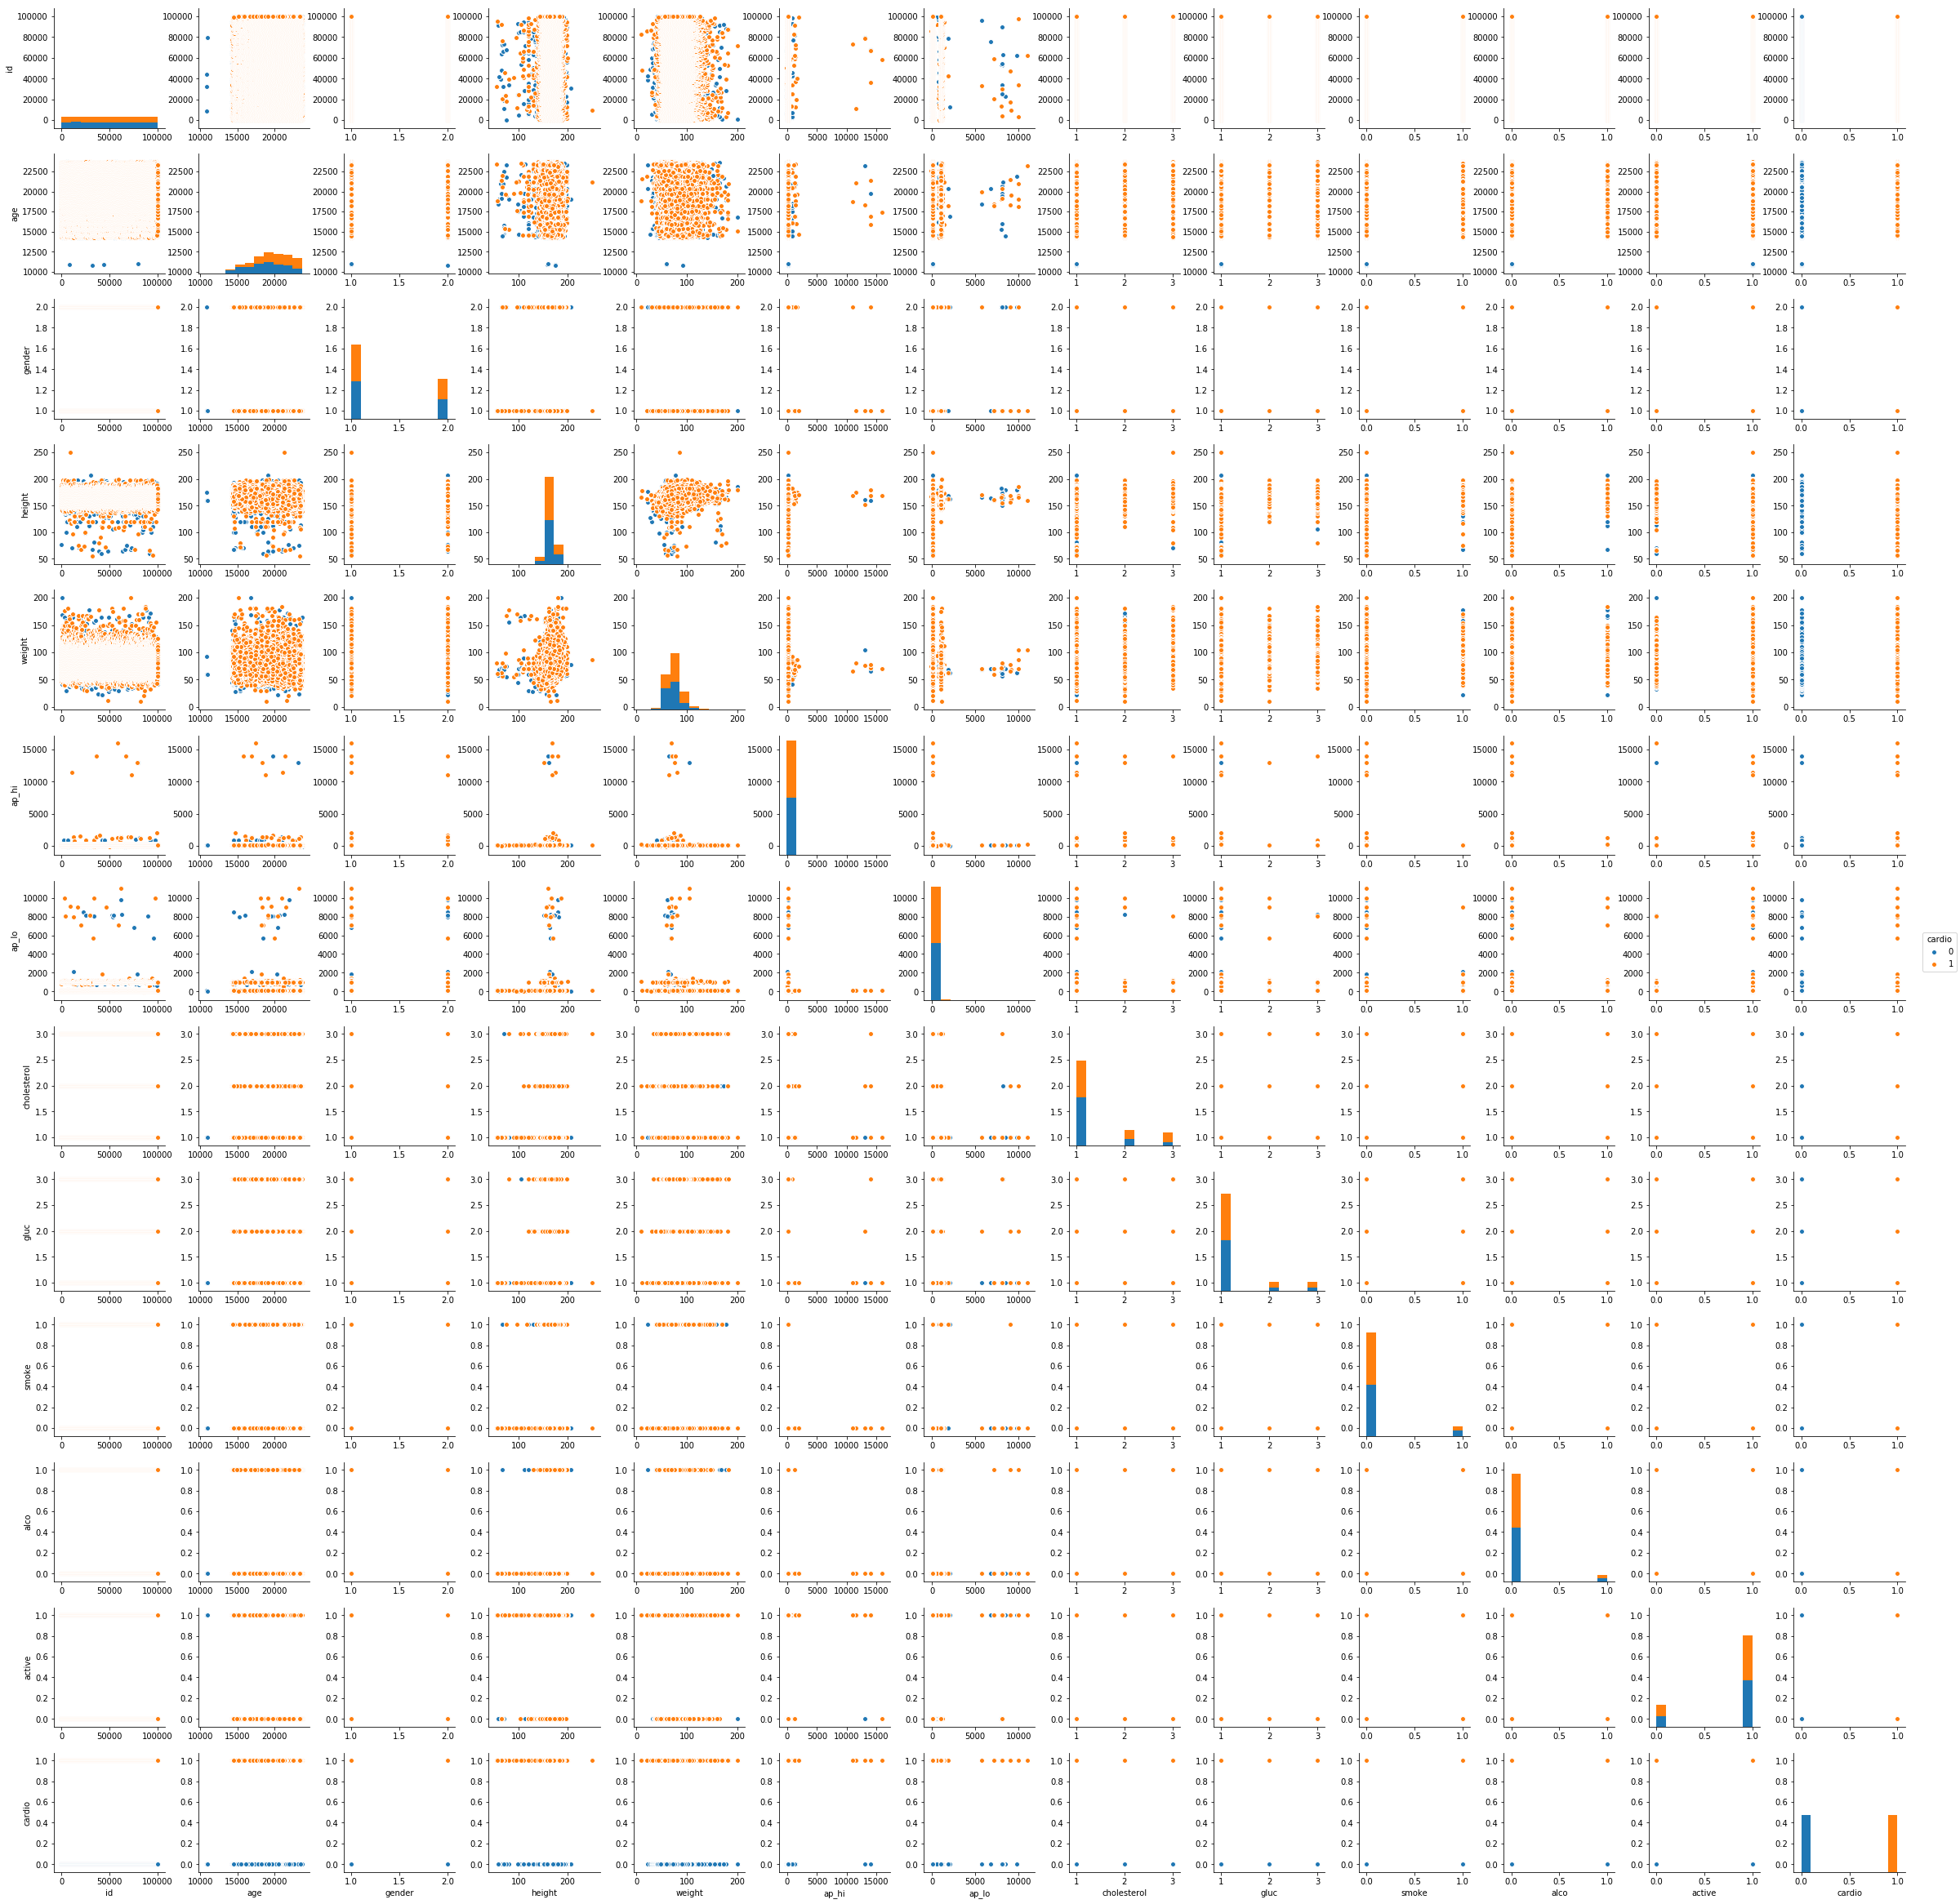

In [18]:
sns.pairplot(data, hue = 'cardio')
plt.show()

The pairplot give an first overview, but many of these plots are not ideal for reading relations and patterns, thus, I will go into more detail in seperate plots below.

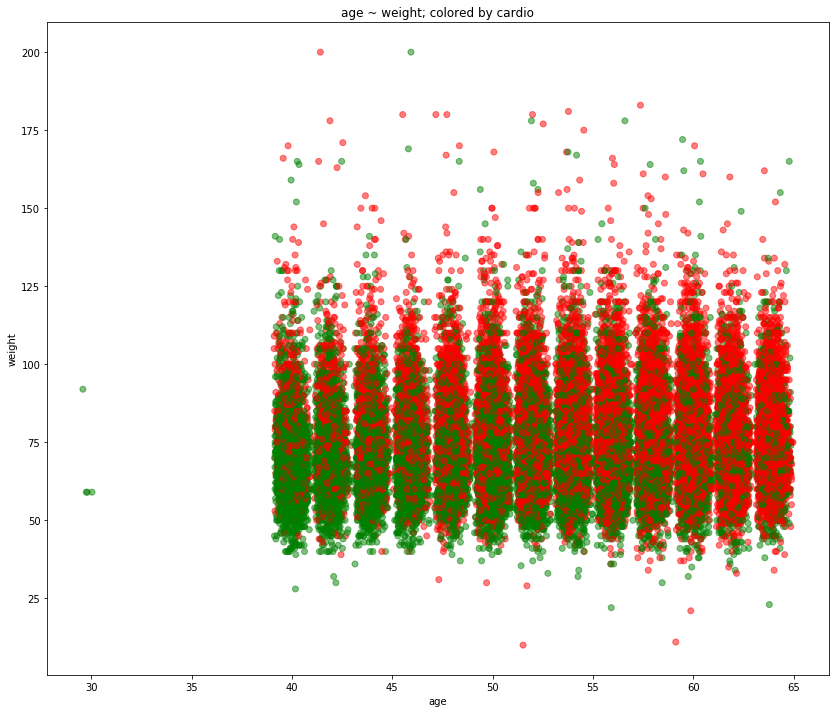

In [19]:
#scatterplot
colors = np.array(["green", "red"])
plt.figure(figsize = (14,12))
plt.scatter(data.age/365, data.weight, color = colors[data.cardio] ,alpha=0.5)
plt.title('age ~ weight; colored by cardio')
plt.xlabel('age')
plt.ylabel('weight')
plt.show()

It seems, that higher values of weight and age correspond visually with a positive case of cardiovascular disease. While this is not a strict trend, the bigger mass of the dataset seems to follow this pattern.

<function matplotlib.pyplot.show(*args, **kw)>

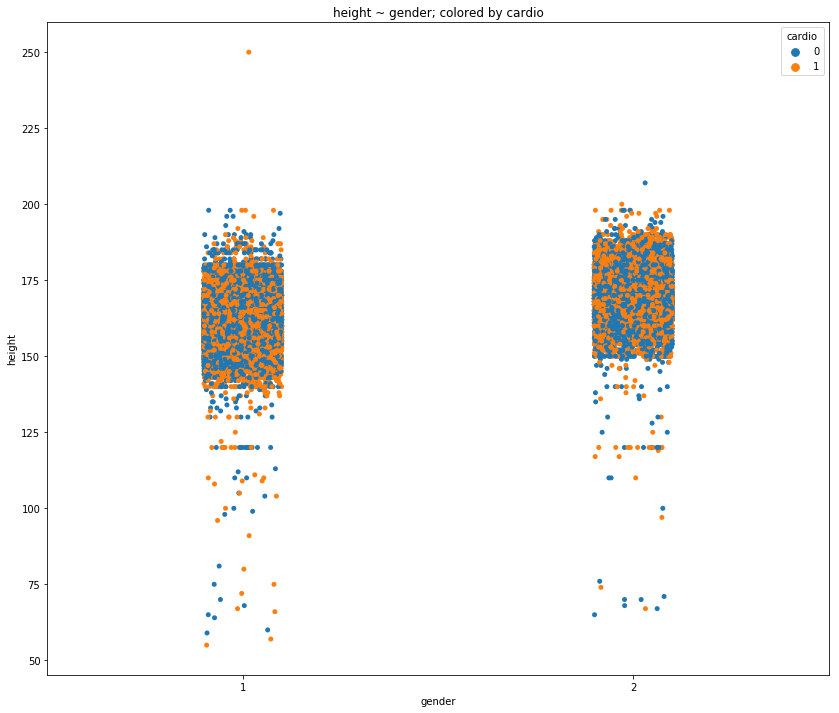

In [20]:
#scatterplot
plt.figure(figsize = (14,12))
ax = sns.stripplot(x="gender", y="height", data=data,hue='cardio', jitter= True)
plt.title('height ~ gender; colored by cardio')
plt.show

There seems to be no visual impact of both gender and height to having a cardiovascular disease. In both Genders the patterns seem not to bulge/cluster in a particular space showing an evenly distributed pattern.

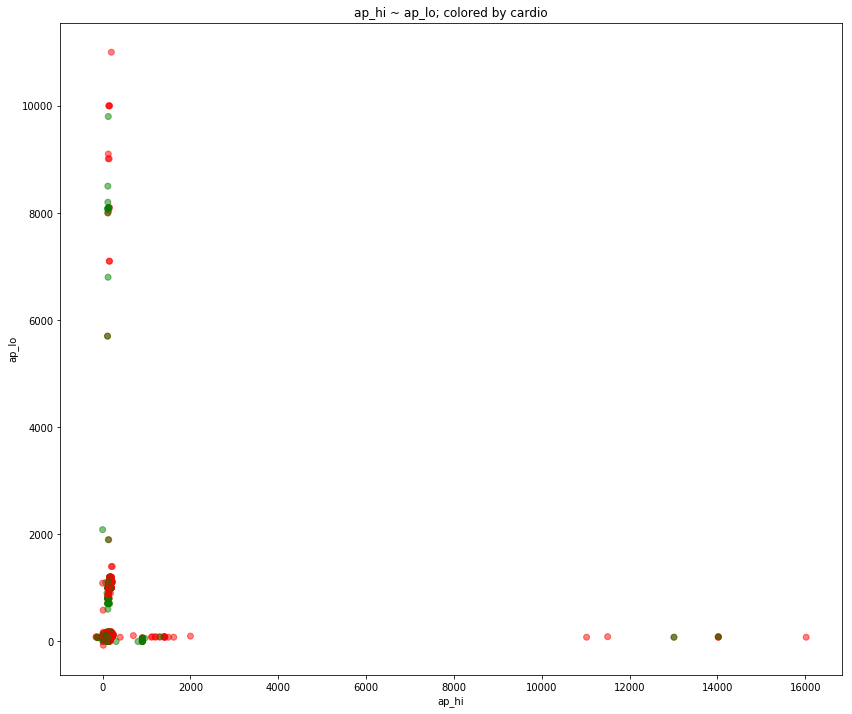

In [21]:
#scatterplot
colors = np.array(["green", "red"])
plt.figure(figsize = (14,12))
plt.scatter(data.ap_hi, data.ap_lo, color = colors[data.cardio] ,alpha=0.5)
plt.title('ap_hi ~ ap_lo; colored by cardio')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.show()

At first, the results seem to be logically impossible since, there is no way of bloodpressure to take on these values, hence we have identified pberservations with wrong entries, that later needs to be removed. However since we focus for now on a visual analysis, I will remove them [[4]](#literature).

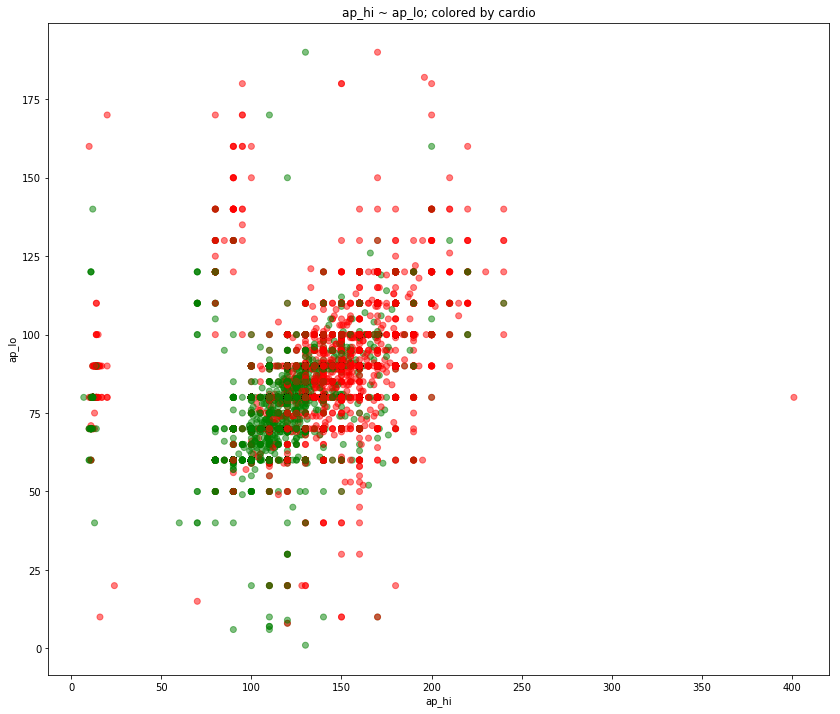

In [22]:
#scatterplot

#subset data accordingly
data_subset = data[(data.ap_hi < 500) & (data.ap_hi > 0) & (data.ap_lo < 500) & (data.ap_lo > 0)]
                              
colors = np.array(["green", "red"])
plt.figure(figsize = (14,12))
plt.scatter(data_subset.ap_hi, data_subset.ap_lo,color = colors[data_subset.cardio] ,alpha=0.5)
plt.title('ap_hi ~ ap_lo; colored by cardio')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.show()

Again, bloodpressure in both cases high and low seems to correspond with cardiovascular diseases in a manner, that lowe values more likely seem to be conencted with a patient not having a cardiovascular disease, while higher values on both features seem to corresponse with a cardiovascular disease.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


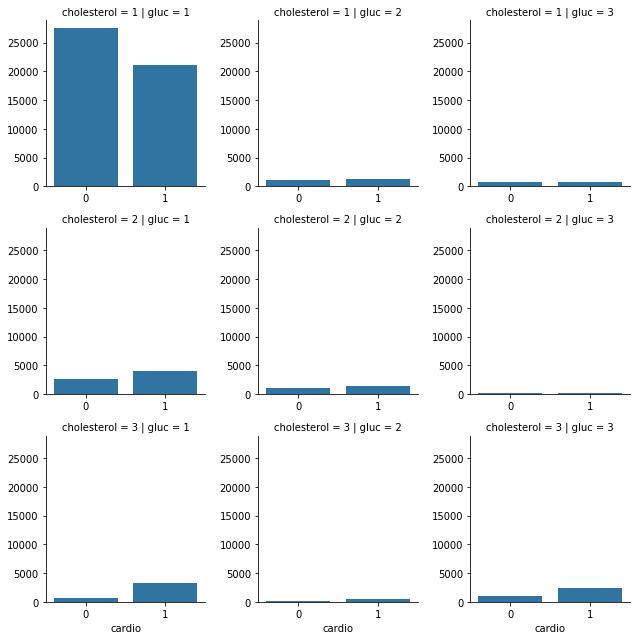

In [23]:
#countplot with grid
plt.figure(figsize = (20,15))
ax=sns.FacetGrid(data, row='cholesterol', col='gluc')
ax.map(sns.countplot, 'cardio')

Most observation fall under normal levels of cholesterol and glucosis and in that case the rist of a heart condition seems moderate. However increasing cholesterol the picture changes in favor to cardiovascular conditions with the highest relative cases occuring for cholesterol 3 and glucose 1. However glucose seems to have not such an effect on the upbringing of cardiovacular diseases.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


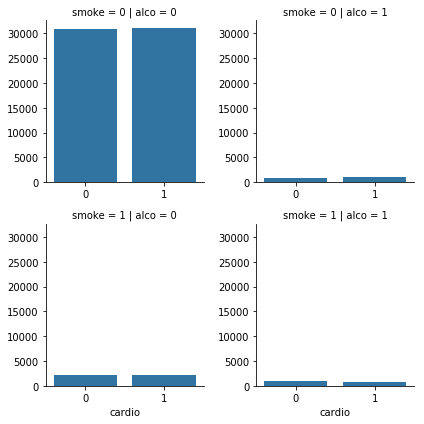

In [24]:
#countplot with grid
plt.figure(figsize = (20,15))
ax=sns.FacetGrid(data, row='smoke', col='alco')
ax.map(sns.countplot, 'cardio')

Again, smoke and alcohol seem to be fairly randomly occuring within the datasets observations. There is no observable pattern, that sticks out here indicating, that alcohol and smoking seem to be non highly connected to the upbringing of a cardiovascular disease - that is atleast based upon the data I am working with.

# Data Preparation <a class="anchor" id="datapreparation"></a>

Now that I had a first look at the data and got first insight, I want to prepare the data for further steps. Since I work with scikit-learn algorithms, my goal is to transform the data in such a way, that it is compatible with machine learning algorithms.

In [25]:
#initial look at data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Looking at hte data initally for preparation, it already is numeric, however I would like to transform age from days back to years, check for extreme values aswell as nans.

In [26]:
#get info on data look for missings
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


It seems, that there are no missings in this dataset, making nan removal obsolete.

In [27]:
#get statistical summary of data 
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Looking at the data in a logical understanding treying to filter for illogical values/values that do not make sense, I identified two features that seem to have bad entries as well as an id-column not having information usefull for classification. Ap_hi and Ap_lo seem to have values, that none Human being would be capable of surviving as well as negative values. These vaslues will be removed.

In [28]:
#drop id, ince it is not needed for further work
data = data.drop('id', 1)

In [29]:
#transform age fron days to years
data['age'] = data['age']/365

In [30]:
#remove illogical values
data = data[(data.ap_hi < 300) & (data.ap_hi > 0)]
data = data[(data.ap_lo < 300) & (data.ap_lo > 0)]

Now, that I have the data cleaned and in a state, in which it could be used by an algorithm for classification. I will create a train and tgestset and seperate dependant and independant features. I also would like to ideate, whether scaling in this situation will lead better metrics than the non-scaled data.

In [31]:
#setting X and y
y = data['cardio']
X = data.drop(['cardio'], axis = 1)

#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#creating test and trainsets
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling & Evaluation <a class="anchor" id="modelingandevaluation"></a>

Since based on the initial problem, I am confronted with a binary classification problem, I would like to do the modelling part of this notebook in a way, that I will be assessing several Classification Algorithms for their sutability with and without scaled data. Once I have suited candidates for further investigation, I will analyze the models and optimize them to further increate the detection quality of risk patients for cardiovascular diseases.

In [32]:
#initializing models
rf_clf = RandomForestClassifier()
logreg_clf = LogisticRegression()
KNN_clf = KNeighborsClassifier(n_neighbors=5)
tree_clf = DecisionTreeClassifier()
MLP_clf = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)

#initializing models for scaled data
rf_clf_scaled = RandomForestClassifier()
logreg_clf_scaled = LogisticRegression()
KNN_clf_scaled = KNeighborsClassifier(n_neighbors=5)
tree_clf_scaled = DecisionTreeClassifier()
MLP_clf_scaled = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)

In [33]:
#training models
rf_model = rf_clf.fit(X_train,y_train)
logreg_model = logreg_clf.fit(X_train,y_train)
KNN_model = KNN_clf.fit(X_train,y_train)
tree_model = tree_clf.fit(X_train,y_train)
MLP_model = MLP_clf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
#training models with scaled data
rf_model_scaled = rf_clf.fit(X_scaled_train,y_scaled_train)
logreg_model_scaled = logreg_clf.fit(X_scaled_train,y_scaled_train)
KNN_model_scaled = KNN_clf.fit(X_scaled_train,y_scaled_train)
tree_model_scaled = tree_clf.fit(X_scaled_train,y_scaled_train)
MLP_model_scaled = MLP_clf.fit(X_scaled_train,y_scaled_train)

In [35]:
#predicting on testset
rf_preds = rf_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)
KNN_preds = KNN_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
MLP_preds = MLP_model.predict(X_test)

In [36]:
#predicting on testset with scaled data
rf_preds_scaled = rf_model.predict(X_scaled_test)
logreg_preds_scaled = logreg_model.predict(X_scaled_test)
KNN_preds_scaled = KNN_model.predict(X_scaled_test)
tree_preds_scaled = tree_model.predict(X_scaled_test)
MLP_preds_scaled = MLP_model.predict(X_scaled_test)

Looking at the metrics of models quality, we want a good accuracy metric overall in order to distingish between risk pations and healthy ones. But more important we want even more algorithms that are capable of classifying risk-patients correctly, before making a false negative i.e. classifying a risk-patient for a cardiovascular disesase as healthy. Thus, we are also interested in recall values. 

In [37]:
#checking results in form of accuracy & precision and recall
print("accuracy :")
print("Random Forest :", accuracy_score(y_test, rf_preds))
print("Logistic Regression :", accuracy_score(y_test, logreg_preds))
print("K-Nearest Neighbors :", accuracy_score(y_test, KNN_preds))
print("Decision Tree :", accuracy_score(y_test, tree_preds))
print("Multilayer Perceptron :", accuracy_score(y_test, MLP_preds))

print("recall :")
print("Random Forest :", recall_score(y_test, rf_preds))
print("Logistic Regression :", recall_score(y_test, logreg_preds))
print("K-Nearest Neighbors :", recall_score(y_test, KNN_preds))
print("Decision Tree :", recall_score(y_test, tree_preds))
print("Multilayer Perceptron :", recall_score(y_test, MLP_preds))

accuracy :
Random Forest : 0.4980792926
Logistic Regression : 0.4980792926
K-Nearest Neighbors : 0.4980792926
Decision Tree : 0.520765383779
Multilayer Perceptron : 0.4980792926
recall :
Random Forest : 1.0
Logistic Regression : 1.0
K-Nearest Neighbors : 1.0
Decision Tree : 0.0972060535506
Multilayer Perceptron : 1.0


In [38]:
print(rf_preds.mean())
print(logreg_preds.mean())
print(KNN_preds.mean())
print(tree_preds.mean())
print(MLP_preds.mean())

1.0
1.0
1.0
0.0779879683989
1.0


Text(0.5,1,'model_metric_accuracy unscaled data')

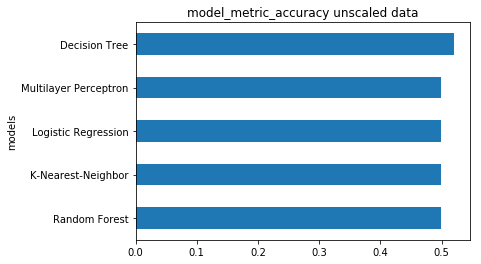

In [39]:
#visualize results metrics
acc_rf=accuracy_score(y_test, rf_preds)
acc_KNN=accuracy_score(y_test, KNN_preds)
acc_logreg=accuracy_score(y_test, logreg_preds)
acc_tree=accuracy_score(y_test, tree_preds)
acc_MLP=accuracy_score(y_test, MLP_preds)
models_accuracy = np.array([acc_rf, acc_KNN, acc_logreg, acc_tree, acc_MLP])

model_metric_accuracy = {"values":models_accuracy, "models": np.array(['Random Forest', "K-Nearest-Neighbor", "Logistic Regression", "Decision Tree", "Multilayer Perceptron"])}
model_metric_accuracy = pd.DataFrame(model_metric_accuracy)

#transform data and plot it
model_metric_accuracy= model_metric_accuracy.set_index('models')
model_metric_accuracy.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_accuracy unscaled data')

Text(0.5,1,'model_metric_recall unscaled data')

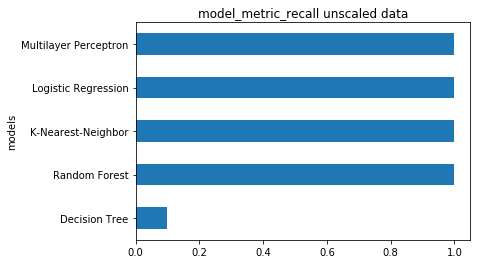

In [40]:
#visualize results metrics
rec_rf=recall_score(y_test, rf_preds)
rec_KNN=recall_score(y_test, KNN_preds)
rec_logreg=recall_score(y_test, logreg_preds)
rec_tree=recall_score(y_test, tree_preds)
rec_MLP=recall_score(y_test, MLP_preds)
models_recall = np.array([rec_rf, rec_KNN, rec_logreg, rec_tree, rec_MLP])

model_metric_recall = {"values":models_recall, "models": np.array(['Random Forest', "K-Nearest-Neighbor", "Logistic Regression", "Decision Tree", "Multilayer Perceptron"])}
model_metric_recall = pd.DataFrame(model_metric_recall)

#transform data and plot it
model_metric_recall= model_metric_recall.set_index('models')
model_metric_recall.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_recall unscaled data')

Based upon the results of the unscaled data, we can infer, that the algorithms do not work well at all with it. The overall threshhold for classification seems to be in a way, that algortihms almost always predict a patient as risk-patient for a cardiovascular disease. Hence using non-scaled data fro this, will not be further followed and I will solely fokus on scaled data.

In [41]:
#checking results in form of accuracy and recall of scaled data
print("accuracy :")
print("Random Forest :", accuracy_score(y_scaled_test, rf_preds_scaled))
print("Logistic Regression :", accuracy_score(y_scaled_test, logreg_preds_scaled))
print("K-Nearest Neighbors :", accuracy_score(y_scaled_test, KNN_preds_scaled))
print("Decision Tree :", accuracy_score(y_scaled_test, tree_preds_scaled))
print("Multilayer Perceptron :", accuracy_score(y_scaled_test, MLP_preds_scaled))

print("recall :")
print("Random Forest :", recall_score(y_scaled_test, rf_preds_scaled))
print("Logistic Regression :", recall_score(y_scaled_test, logreg_preds_scaled))
print("K-Nearest Neighbors :", recall_score(y_scaled_test, KNN_preds_scaled))
print("Decision Tree :", recall_score(y_scaled_test, tree_preds_scaled))
print("Multilayer Perceptron :", recall_score(y_scaled_test, MLP_preds_scaled))

accuracy :
Random Forest : 0.698557657462
Logistic Regression : 0.728201782996
K-Nearest Neighbors : 0.692179459303
Decision Tree : 0.631804015366
Multilayer Perceptron : 0.72218598246
recall :
Random Forest : 0.64973806752
Logistic Regression : 0.673020954598
K-Nearest Neighbors : 0.676367869616
Decision Tree : 0.634458672875
Multilayer Perceptron : 0.703870779977


Text(0.5,1,'model_metric_accuracy scaled data')

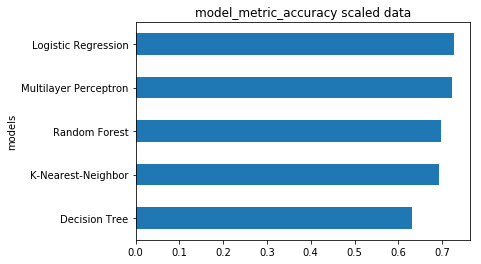

In [42]:
#visualize results metrics
acc_rf=accuracy_score(y_scaled_test, rf_preds_scaled)
acc_KNN=accuracy_score(y_scaled_test, KNN_preds_scaled)
acc_logreg=accuracy_score(y_scaled_test, logreg_preds_scaled)
acc_tree=accuracy_score(y_scaled_test, tree_preds_scaled)
acc_MLP=accuracy_score(y_scaled_test, MLP_preds_scaled)
models_accuracy = np.array([acc_rf, acc_KNN, acc_logreg, acc_tree, acc_MLP])

model_metric_accuracy = {"values":models_accuracy, "models": np.array(['Random Forest', "K-Nearest-Neighbor", "Logistic Regression", "Decision Tree", "Multilayer Perceptron"])}
model_metric_accuracy = pd.DataFrame(model_metric_accuracy)

#transform data and plot it
model_metric_accuracy= model_metric_accuracy.set_index('models')
model_metric_accuracy.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_accuracy scaled data')

Text(0.5,1,'model_metric_recall scaled data')

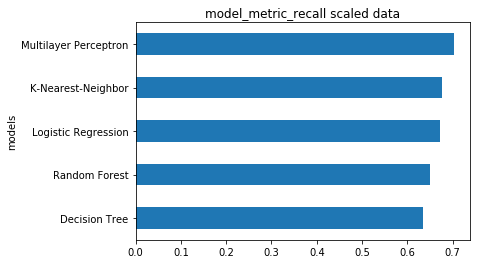

In [43]:
#visualize results metrics
rec_rf=recall_score(y_scaled_test, rf_preds_scaled)
rec_KNN=recall_score(y_scaled_test, KNN_preds_scaled)
rec_logreg=recall_score(y_scaled_test, logreg_preds_scaled)
rec_tree=recall_score(y_scaled_test, tree_preds_scaled)
rec_MLP=recall_score(y_scaled_test, MLP_preds_scaled)
models_recall = np.array([rec_rf, rec_KNN, rec_logreg, rec_tree, rec_MLP])

model_metric_recall = {"values":models_recall, "models": np.array(['Random Forest', "K-Nearest-Neighbor", "Logistic Regression", "Decision Tree", "Multilayer Perceptron"])}
model_metric_recall = pd.DataFrame(model_metric_recall)

#transform data and plot it
model_metric_recall= model_metric_recall.set_index('models')
model_metric_recall.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_recall scaled data')

Within the algorithms working with scaled data Multilayer Perceptron and Logistic Regression seem to be the most suited candidates for this classification problem. My next step will be trying to optimize these to models and then reassess their performance, before I pick a final model.

In [44]:
print(MLP_model_scaled.get_params)
print(logreg_model_scaled.get_params)

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)>
<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>


In [45]:
#initiate hyperparameter grid
params_logreg = {'penalty' : ['l1', 'l2'],
    'C' : [0.01, 1, 2]}

params_MLP = {
    'max_iter': [5, 20],
    'hidden_layer_sizes': [(10,10,10), (10,20,10), (15,), (10,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive']
}

In [46]:
#perform gridsearch
grid_search_logreg = GridSearchCV(logreg_model_scaled, params_logreg, n_jobs = -1, verbose = 3, scoring = 'recall')
grid_search_MLP = GridSearchCV(MLP_model_scaled, params_MLP, n_jobs = -1, verbose = 3, scoring = 'recall')

In [47]:
#fit gridsearch results to data and predict testset
grid_search_logreg.fit(X_scaled_train,y_scaled_train)
grid_search_MLP.fit(X_scaled_train,y_scaled_train)

best_model_logreg = grid_search_logreg.best_estimator_
best_model_MLP = grid_search_MLP.best_estimator_

preds_logreg_best = best_model_logreg.predict(X_scaled_test)
preds_MLP_best = best_model_MLP.predict(X_scaled_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ...... C=0.01, penalty=l1, score=0.662046204620462, total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ...... C=0.01, penalty=l1, score=0.666996699669967, total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... C=0.01, penalty=l1, score=0.6648696226207503, total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.6663366336633664, total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...... C=0.01, penalty=l2, score=0.673047304730473, total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.6668500385080867, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.6665566556655665, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ......... C=1, penalty=l1, score=0.673047304730473, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.6666299922983827, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6831683168316832, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6819232038728132, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6843784378437844, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6780723952029927, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6787678767876788, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6872387238723873, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6847838045989658, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6907590759075908, total=   2.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7007700770077008, total=   2.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7042578941577732, total=   2.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6831683168316832, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6819232038728132, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6843784378437844, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6780723952029927, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6787678767876788, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6872387238723873, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6847838045989658, total=   2.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6907590759075908, total=   2.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7007700770077008, total=   2.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7042578941577732, total=   2.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6864686468646864, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6971397139713972, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6897348443173066, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6711771177117711, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6666666666666666, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6697106392342392, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6834983498349835, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6902090209020902, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6866541973814501, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6796479647964796, total=   3.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7013201320132013, total=   3.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6892947518978986, total=   3.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6864686468646864, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6971397139713972, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6897348443173066, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6711771177117711, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6666666666666666, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6697106392342392, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6834983498349835, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6902090209020902, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6866541973814501, total=   2.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6796479647964796, total=   2.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7013201320132013, total=   3.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6892947518978986, total=   3.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6605060506050605, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6653465346534654, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6598085597975575, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.67007700770077, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6682068206820682, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6796127186709209, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6651265126512651, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6708470847084709, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6664099460886787, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6832783278327833, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6783278327832784, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6813730883485531, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6605060506050605, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6653465346534654, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6598085597975575, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.67007700770077, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6682068206820682, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6796127186709209, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6651265126512651, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6708470847084709, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6664099460886787, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6832783278327833, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6783278327832784, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6813730883485531, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6771177117711771, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6838283828382838, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6747717020574321, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6697469746974698, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6757975797579758, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6759819562108043, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.670957095709571, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6790979097909791, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6740015403234679, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6732673267326733, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6811881188118812, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6845637583892618, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6771177117711771, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6838283828382838, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6747717020574321, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6697469746974698, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6757975797579758, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6759819562108043, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.670957095709571, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6790979097909791, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6740015403234679, total=   1.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6732673267326733, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6811881188118812, total=   1.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6845637583892618, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6831683168316832, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6819232038728132, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6843784378437844, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6780723952029927, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6787678767876788, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6873487348734874, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6846737814941137, total=   2.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.690979097909791, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7007700770077008, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7042578941577732, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6831683168316832, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6819232038728132, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6843784378437844, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6780723952029927, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6787678767876788, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6873487348734874, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6846737814941137, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.690979097909791, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7007700770077008, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7042578941577732, total=   2.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6864686468646864, total=   1.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6971397139713972, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6897348443173066, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6711771177117711, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6666666666666666, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6698206623390912, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6834983498349835, total=   2.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6902090209020902, total=   2.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6866541973814501, total=   2.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6795379537953795, total=   3.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7015401540154015, total=   3.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6891847287930465, total=   3.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6864686468646864, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6971397139713972, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6897348443173066, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6711771177117711, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6666666666666666, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6698206623390912, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6834983498349835, total=   2.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6902090209020902, total=   2.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6866541973814501, total=   2.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6795379537953795, total=   3.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7015401540154015, total=   3.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6891847287930465, total=   3.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6605060506050605, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6653465346534654, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6598085597975575, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.67007700770077, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6682068206820682, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6796127186709209, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6651265126512651, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6708470847084709, total=   1.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6664099460886787, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6833883388338834, total=   1.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6783278327832784, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6811530421388492, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6605060506050605, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6653465346534654, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6598085597975575, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.67007700770077, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6682068206820682, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6796127186709209, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6651265126512651, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6708470847084709, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6664099460886787, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6833883388338834, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6783278327832784, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6811530421388492, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6771177117711771, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6838283828382838, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6747717020574321, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6697469746974698, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6757975797579758, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6759819562108043, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.670957095709571, total=   1.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6790979097909791, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6740015403234679, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6731573157315731, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6811881188118812, total=   1.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6844537352844098, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6771177117711771, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6838283828382838, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6747717020574321, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6697469746974698, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6757975797579758, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6759819562108043, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.670957095709571, total=   1.2s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6790979097909791, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6740015403234679, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6731573157315731, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6811881188118812, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6844537352844098, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6842684268426843, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.680822972824293, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6812981298129813, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6885588558855885, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6763120255253603, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6993399339933993, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7075907590759076, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7006271316976566, total=   2.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6896589658965897, total=   2.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7088008800880088, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6894047750027505, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6842684268426843, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.680822972824293, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6812981298129813, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6885588558855885, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6763120255253603, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6993399339933993, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7075907590759076, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7006271316976566, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6896589658965897, total=   2.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7088008800880088, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6894047750027505, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.695049504950495, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.7044004400440044, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6901749367367147, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6994499449944994, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6783278327832784, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6922653757289031, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7035203520352035, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7056105610561056, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7064583562548135, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7057205720572057, total=   2.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7117711771177118, total=   2.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6963362306084278, total=   2.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.695049504950495, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.7044004400440044, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6901749367367147, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6994499449944994, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6783278327832784, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6922653757289031, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7035203520352035, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7056105610561056, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7064583562548135, total=   2.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7057205720572057, total=   2.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7117711771177118, total=   2.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6963362306084278, total=   2.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.697029702970297, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6943894389438944, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.692155352624051, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6904290429042904, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.699009900990099, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.7120695346022665, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.693069306930693, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6968096809680968, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6947959071404995, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.7047304730473047, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.6911991199119912, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.7009572010122126, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.697029702970297, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6943894389438944, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.692155352624051, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6904290429042904, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.699009900990099, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.7120695346022665, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.693069306930693, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6968096809680968, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6947959071404995, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7047304730473047, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6911991199119912, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7009572010122126, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6927392739273928, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6993399339933993, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6971063923423919, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6803080308030803, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6906490649064907, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6894047750027505, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6867986798679868, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6952695269526953, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6890747056881945, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6851485148514852, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6917491749174918, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6911651446803829, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6927392739273928, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6993399339933993, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6971063923423919, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6803080308030803, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6906490649064907, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6894047750027505, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6867986798679868, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6952695269526953, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6890747056881945, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6851485148514852, total=   1.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6917491749174918, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6911651446803829, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6842684268426843, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.680822972824293, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.681958195819582, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6883388338833883, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6758719331059523, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.6994499449944994, total=   1.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7075907590759076, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7005171085928045, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6896589658965897, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7088008800880088, total=   2.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.692155352624051, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6842684268426843, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6921892189218922, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.680822972824293, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.681958195819582, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6883388338833883, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6758719331059523, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6994499449944994, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7075907590759076, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7005171085928045, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6896589658965897, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7088008800880088, total=   2.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.692155352624051, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.695049504950495, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.7044004400440044, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=sgd, score=0.6901749367367147, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6996699669966997, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6772277227722773, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=5, solver=adam, score=0.6925954450434592, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7035203520352035, total=   2.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7056105610561056, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=sgd, score=0.7064583562548135, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7041804180418042, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.7108910891089109, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=constant, max_iter=20, solver=adam, score=0.6935856529871273, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.695049504950495, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.7044004400440044, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6901749367367147, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6996699669966997, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6772277227722773, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6925954450434592, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7035203520352035, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7056105610561056, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.7064583562548135, total=   2.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7041804180418042, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7108910891089109, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10, 20, 10), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6935856529871273, total=   2.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.697029702970297, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6943894389438944, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=sgd, score=0.692155352624051, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6904290429042904, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.6993399339933993, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=5, solver=adam, score=0.7119595114974144, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.693069306930693, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6965896589658966, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6947959071404995, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.7044004400440044, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.690979097909791, total=   1.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, max_iter=20, solver=adam, score=0.7006271316976566, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.697029702970297, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6943894389438944, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.692155352624051, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6904290429042904, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6993399339933993, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.7119595114974144, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.693069306930693, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6965896589658966, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6947959071404995, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7044004400440044, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.690979097909791, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.7006271316976566, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6928492849284928, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6993399339933993, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=sgd, score=0.6972164154472439, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6908690869086909, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=5, solver=adam, score=0.6894047750027505, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6867986798679868, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6952695269526953, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=sgd, score=0.6890747056881945, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6847084708470847, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.6918591859185919, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, max_iter=20, solver=adam, score=0.691715260204643, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6928492849284928, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6993399339933993, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=sgd, score=0.6972164154472439, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6804180418041804, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6908690869086909, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=5, solver=adam, score=0.6894047750027505, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6867986798679868, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6952695269526953, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=sgd, score=0.6890747056881945, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6847084708470847, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.6918591859185919, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam 


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  7.8min finished


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, max_iter=20, solver=adam, score=0.691715260204643, total=   1.2s


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
#checking results in form of accuracy and recall of scaled data after tuning models
print("accuracy :")
print("Logistic Regression :", accuracy_score(y_scaled_test, preds_logreg_best))
print("Multilayer Perceptron :", accuracy_score(y_scaled_test, preds_MLP_best))

print("recall :")
print("Logistic Regression :", recall_score(y_scaled_test, preds_logreg_best))
print("Multilayer Perceptron :", recall_score(y_scaled_test, preds_MLP_best))

accuracy :
Logistic Regression : 0.728201782996
Multilayer Perceptron : 0.726317315358
recall :
Logistic Regression : 0.673020954598
Multilayer Perceptron : 0.7032887078


Text(0.5,1,'model_metric_recall scaled data after gridsearch')

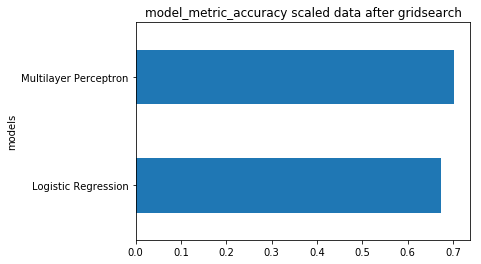

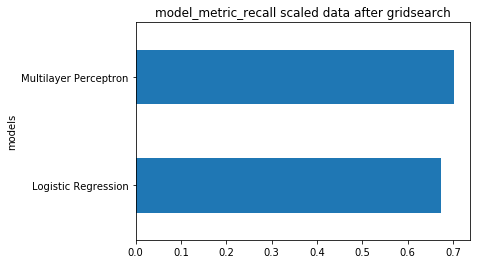

In [52]:
#visualize results metrics
acc_logreg=accuracy_score(y_scaled_test, preds_logreg_best)
acc_MLP=accuracy_score(y_scaled_test, preds_MLP_best)

rec_logreg=recall_score(y_scaled_test, preds_logreg_best)
rec_MLP=recall_score(y_scaled_test, preds_MLP_best)

models_accuracy = np.array([acc_logreg,acc_MLP])
models_recall = np.array([rec_logreg, rec_MLP])

model_metric_accuracy = {"values":models_accuracy, "models": np.array(["Logistic Regression","Multilayer Perceptron"])}
model_metric_accuracy = pd.DataFrame(model_metric_accuracy)

model_metric_recall = {"values":models_recall, "models": np.array(["Logistic Regression","Multilayer Perceptron"])}
model_metric_recall = pd.DataFrame(model_metric_recall)

#transform data and plot it
model_metric_accuracy= model_metric_recall.set_index('models')
model_metric_accuracy.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_accuracy scaled data after gridsearch')

model_metric_recall= model_metric_recall.set_index('models')
model_metric_recall.sort_values("values", ascending=True).plot.barh(legend=None)
plt.title('model_metric_recall scaled data after gridsearch')

Assessing the results, of the Hypergrid search, I could not get significant improvements of the model compared to the default models.

In [49]:
#create final model
model_final = best_model_MLP

Now, after I created a model which is ready for predicting further data, I would like to go over assessing how the algorithm makes it decision. Since there is not a good way for doing this with a neural network and observing how a NN makes decisions and the Random Forest also did predict in an acceptable degree according to metrics, I will use the already fit Random Forest model to get an understanding, which features are most relevant for the models classification process. 

Text(0.5,1,'random forest: feature importance')

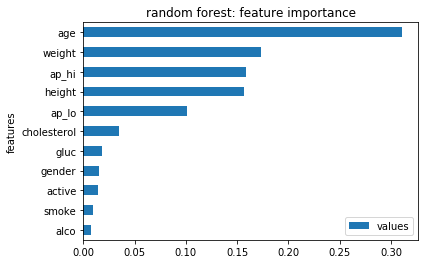

In [50]:
#get feature importances of rf_model
feat_imp = rf_model.feature_importances_
feat_imp = {"values":feat_imp, "features": data.columns[:-1]}
feat_imp = pd.DataFrame(feat_imp)

#transform data and plot it
feat_imp= feat_imp.set_index('features')
plt.figure(figsize = (15,15))
feat_imp.sort_values("values", ascending=True).plot.barh()
plt.title('random forest: feature importance')

According to the Random Forest Algorithm, the features age, weight closely followed by bloodpressure and height are affecting the algorithms choicemanking process the most. For age, blood pressure and weight this seems reasonable. However features assumed previously as important like cholesterol and active, seem to have a fairly small impact, which is quite contradicting. A possible explanation to this is, the brought mass is not categorized to higher levels for cholesterol for example.

# Conclusion & Critical Evaluation <a class="anchor" id="conclusionanderiticalevaluation"></a>

Concluding, I assessed a self-given problem of creating a classificator, that is able to predict the presence of cardiovascuilar disease based upon commonly available information about a person, following the CRISP-DM Process.

Limitations of this notebooks outcome, though are that the algorithms results in form of metrics, are not that good and would need further improving in order to make it into a usable/applicable state delivering remotely trustworthy results to practiononers. 

Possible explanations for these non-satisfactiory results could be two things, first, the dataset works with mostly binary/tertiary classified features, if we could a more detailed insight into for example cholesterol levels or activity and alcohol consumption or smoking habits. Also additional information about might be very useful in further increasing the models precision.

Furthermore I do not know how truthfully participants of the data gathering process answered relevant questions, for example we can see a  high level of observations with no alohol/smoking intake habits or persons who stated to be physically active, which according to statistics may diverge from reality. 

# **Literature**<a class="anchor" id="optimierung"></a>

[1]<a class="anchor" id="diamanten-4cs"></a> WHO: Cardiovascular Diseases (2020), https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1

[2]: Wikipedia: CRISP-DM (2020), https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

[3] DataScience Stackexchange (2020), https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

[4] Healthline: Bloodpressure explained (2020), https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained